In Jupyter, create a bar chart showing the number of occurrences of the overall most abundant complaint type over the first 2 months of 2024. (note: before making the plot, you’ll need to figure out the complaint type to use)
How does this compare to that same complaint type in June-July of 2024?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
jan_feb = pd.read_csv("../data/complaints_jan_feb.csv")

# Sum counts across boroughs for each complaint type
totals = jan_feb.groupby("complaint type")["count"].sum().sort_values(ascending=False)

# Find most frequent complaint
top_type = totals.idxmax()
top_type, totals.iloc[0]



('HEAT/HOT WATER', np.int64(80290))

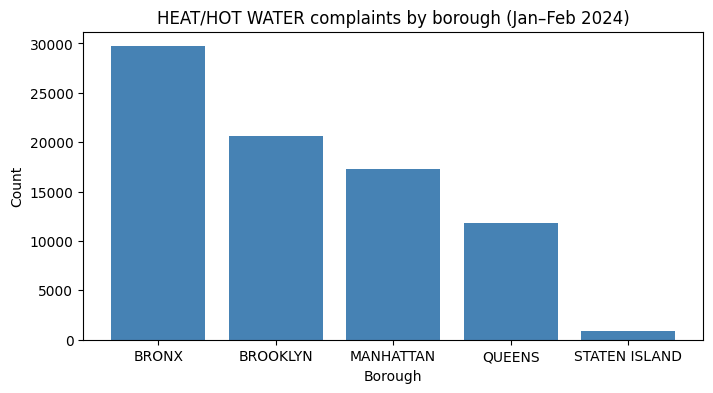

In [3]:
# Filter for that complaint type
jan_feb_top = jan_feb[jan_feb["complaint type"] == top_type]

plt.figure(figsize=(8,4))
plt.bar(jan_feb_top["borough"], jan_feb_top["count"], color="steelblue")
plt.title(f"{top_type} complaints by borough (Jan–Feb 2024)")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()


Compare with june july 

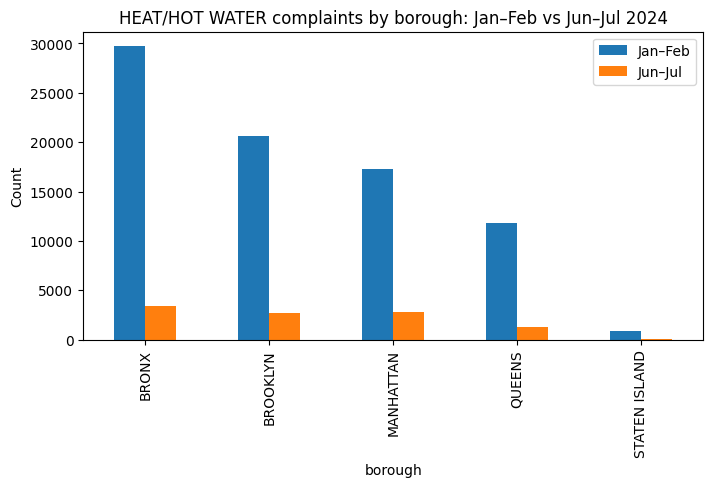

,borough,Jan–Feb,Jun–Jul
0,BRONX,29699,3393
1,BROOKLYN,20583,2714
2,MANHATTAN,17318,2757
3,QUEENS,11856,1263
4,STATEN ISLAND,834,120


In [5]:
jun_jul = pd.read_csv("../data/complaints_jun_jul.csv")
jun_jul_top = jun_jul[jun_jul["complaint type"] == top_type]

# Combine side-by-side
merged = pd.merge(
    jan_feb_top[["borough","count"]].rename(columns={"count": "Jan–Feb"}),
    jun_jul_top[["borough","count"]].rename(columns={"count": "Jun–Jul"}),
    on="borough", how="outer"
).fillna(0)

merged.plot(x="borough", kind="bar", figsize=(8,4))
plt.title(f"{top_type} complaints by borough: Jan–Feb vs Jun–Jul 2024")
plt.ylabel("Count")
plt.show()

merged
